# Audio Noise Separation

Proposed Algorithm :
1. Load Audio
2. Convert it from time domain data to frequency domain data using FFT(Fast Fourier Transformation)
3. Perform Calculations(Separate noise from audio)
4. Apply Inverse Fourier Transformation on extracted audios
5. Export Audios


Resources : 
- [Understanding Audio data](https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520)

In [7]:
import librosa
from librosa import display
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
import numpy as np
import soundfile as sf

## Step 1 : Load Audio

In [2]:
# loading audio
def load_audio(filepath):
    samples, sampling_rate = librosa.load(filepath, sr = None, mono = True, offset = 0.0, duration = None)
    return samples, sampling_rate
    
file_path = "./data/sample1/overlayed.mp3"
samples, sampling_rate = load_audio(file_path)
len(samples), sampling_rate

(188416, 44100)

In [3]:
# duration
duration_of_sound = len(samples) / sampling_rate
print("Duration of audio :", duration_of_sound, "seconds")

Duration of audio : 4.272471655328798 seconds


In [4]:
Audio(file_path)

### Time domain representation

In [8]:
 def plot_waveshow_td_representation(audio, sampling_rate):
    plt.figure(figsize=(15,7))
    display.waveshow(y = audio, sr = sampling_rate)
    plt.xlabel("Time (in seconds)")
    plt.ylabel("Amplitude")
    return plt.show()

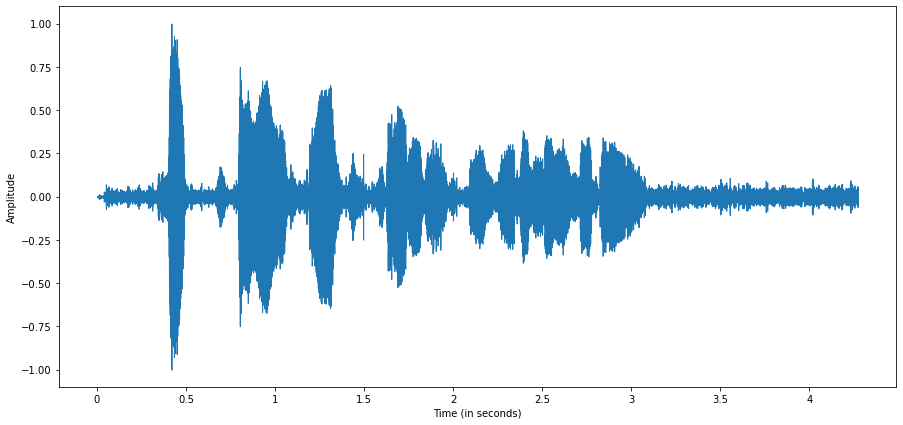

In [9]:
plot_waveshow_td_representation(samples, sampling_rate)

## Step 2 : Apply Fourier Transform

### Frequency domain representation

In [13]:
def perform_fft(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    frequency_data = scipy.fft.fft(audio)
    magnitude = np.linspace(0.0, 1.0/(2.0*T), n//2)
    return frequency_data, magnitude

In [14]:
def plot_fd_representation(frequency_data, magnitude):
    plt.rcParams["figure.figsize"] = [15, 7]
    n = len(frequency_data)
    fig, ax = plt.subplots()
    ax.plot(magnitude, 2.0/n * np.abs(frequency_data[:n//2]))
    plt.grid()
    plt.xlabel("Frequency ->")
    plt.ylabel("Magnitude")
    return plt.show()

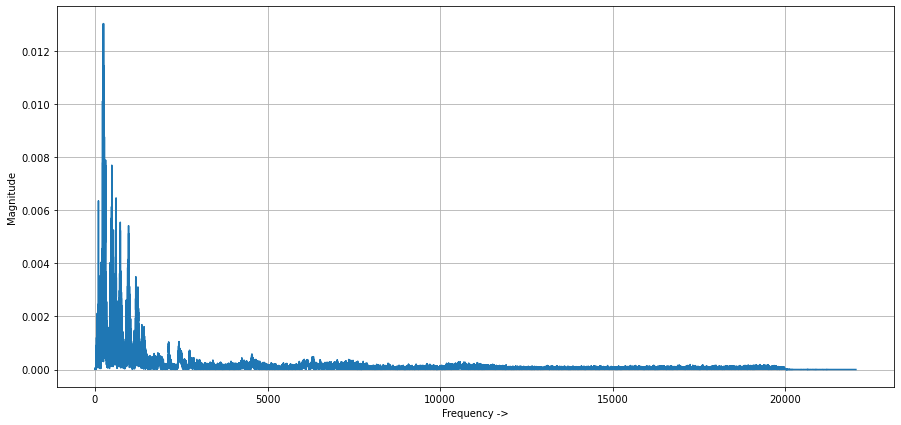

In [15]:
frequency_data, magnitude = perform_fft(samples, sampling_rate)
plot_fd_representation(frequency_data, magnitude)

### Spectogram

## Step 3 : Perform Calculations

## Step 4 : Perform Inverse Fourier Transform

### inverse fourier transform

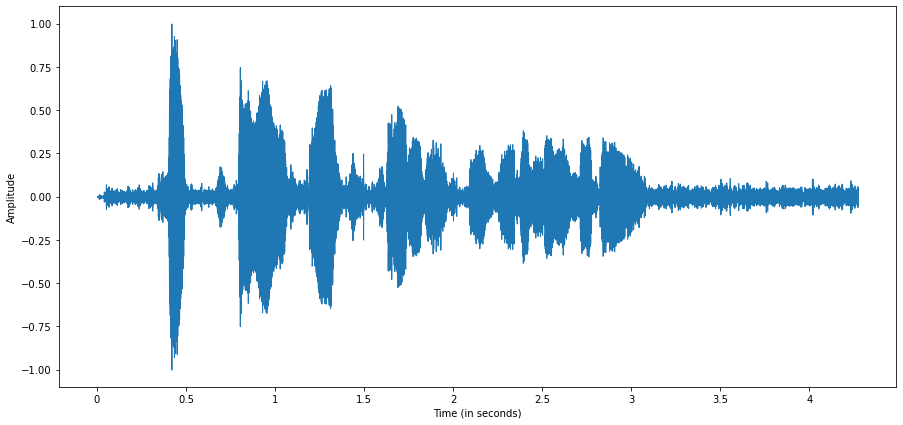

In [16]:
inverse_fft_result = scipy.fftpack.ifft(frequency_data).real
plot_waveshow_td_representation(inverse_fft_result, sampling_rate)

## Step 5 : Extract Audio

In [18]:
def extract_audio(filename, audio, sampling_rate):
    sf.write(filename, audio, samplerate=sampling_rate)
    print("Extracted Successfully")

In [19]:
extract_audio('./output/output.wav', inverse_fft_result, sampling_rate)

Extracted Successfully
